In [1]:

import numpy as np
import pandas as pd
import nltk
import re
from  nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# col_name = ['target','id','date','flag','user','text']
twitter_data = pd.read_csv('twitter_data_stemmed.csv')

In [3]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [4]:
nan_counts = twitter_data.isna().sum()
print(nan_counts)

target               0
id                   0
date                 0
flag                 0
user                 0
text                 0
stemmed_content    495
dtype: int64


In [5]:
twitter_data['stemmed_content'].replace({np.nan: ''}, inplace=True)


In [6]:
nan_counts = twitter_data.isna().sum()
print(nan_counts)

target             0
id                 0
date               0
flag               0
user               0
text               0
stemmed_content    0
dtype: int64


In [7]:
twit = twitter_data[["stemmed_content", "target"]]

In [8]:
twit.count()

stemmed_content    1600000
target             1600000
dtype: int64

In [35]:
positive_array = twit[twit["target"] == 1].head(10000).reset_index(drop=True)
negative_array = twit[twit["target"] == 0].head(10000).reset_index(drop=True)

In [36]:
print(positive_array.shape)
print(negative_array.shape)

(10000, 2)
(10000, 2)


In [37]:
#  Concatenate the two subsets to create the final DataFrame with equal counts of both classes
new_df = pd.concat([positive_array, negative_array])

# Shuffle the rows to randomize the order
new_df = new_df.sample(frac=1).reset_index(drop=True)

In [38]:
new_df.count()

stemmed_content    20000
target             20000
dtype: int64

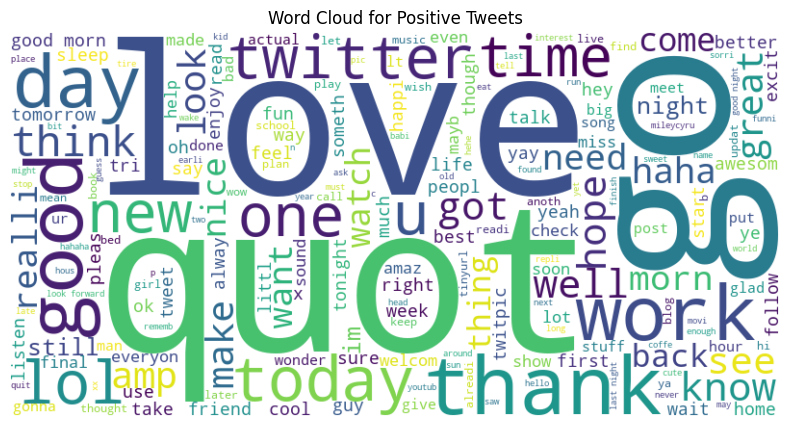

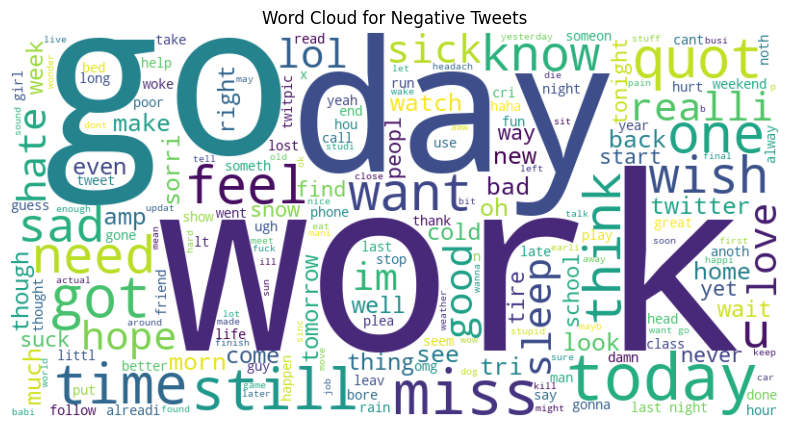

In [39]:
# Separate positive and negative tweets
positive_tweets = new_df[new_df['target'] == 1]
negative_tweets = new_df[new_df['target'] == 0]

# Function to generate and plot word clouds
def generate_word_cloud(data, sentiment):
    all_text = ' '.join(data['stemmed_content'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative tweets
generate_word_cloud(positive_tweets, 'Positive')
generate_word_cloud(negative_tweets, 'Negative')

In [40]:
all_words = ' '.join(new_df['stemmed_content']).split()
print(all_words)
print(len(all_words))
unique_words = set(all_words)
print(len(unique_words))

['myfolia', 'let', 'know', 'guy', 'great', 'job', 'cloud', 'hover', 'life', 'final', 'part', 'way', 'begin', 'see', 'sun', 'feel', 'good', 'fuck', 'len', 'wein', 'hous', 'caught', 'fire', 'earlier', 'today', 'famili', 'safe', 'lost', 'dog', 'thegazzman', 'yeah', 'like', 'like', 'il', 'divo', 'lordshap', 'bait', 'breath', 'huh', 'hope', 'maintain', 'expect', 'shoot', 'updat', 'weekend', 'keep', 'u', 'post', 'oh', 'look', 'like', 'go', 'rain', 'neither', 'jacket', 'umbrella', 'rain', 'right', 'easter', 'josui', 'gd', 'env', 'search', 'back', 'byron', 'bay', 'cafe', 'fresh', 'miss', 'melbourn', 'friend', 'alisonhogarth', 'complet', 'need', 'worri', 'tri', 'get', 'back', 'pro', 'evo', 'amypalko', 'goog', 'morn', 'see', 'monster', 'vs', 'alien', 'later', 'fun', 'day', 'nickitynatnat', 'color', 'purpl', 'miss', 'friend', 'elementari', 'middl', 'school', 'beatccr', 'wow', 'disappoint', 'one', 'realli', 'look', 'forward', 'quarter', 'abhian', 'abey', 'lalloo', 'n', 'dake', 'went', 'pm', 'show'

In [41]:
print(positive_array)

                                        stemmed_content  target
0                      love health uandpet u guy r best       1
1         im meet one besti tonight cant wait girl talk       1
2     darealsunisakim thank twitter add sunisa got m...       1
3     sick realli cheap hurt much eat real food plu ...       1
4                          lovesbrooklyn effect everyon       1
...                                                 ...     ...
9995  morn slack two day twitter finish good run rea...       1
9996                      bensumm sweet altruism finest       1
9997  jakros um milk father udder quot milk mother q...       1
9998             zenaweist could also tweet beccarobert       1
9999  good lord still work email catch actual read t...       1

[10000 rows x 2 columns]


In [42]:
new_df.head()

,stemmed_content,target
0,myfolia let know guy great job,1
1,cloud hover life final part way begin see sun ...,1
2,fuck len wein hous caught fire earlier today f...,0
3,thegazzman yeah like like il divo,1
4,lordshap bait breath huh hope maintain expect ...,1


# Creating Frequency Table

In [43]:
import pandas as pd
from collections import defaultdict

def create_frequency_df(new_df):
    # Initialize frequency dictionaries
    positive_freq_dict = defaultdict(int)
    negative_freq_dict = defaultdict(int)

    # Iterate over each row in the DataFrame
    for index, row in new_df.iterrows():
        # Tokenize the stemmed content into individual words
        words = row['stemmed_content'].split()
        # Update frequency dictionaries based on target class
        for word in words:
            if row['target'] == 1:
                positive_freq_dict[word] += 1
            else:
                negative_freq_dict[word] += 1

    # Combine positive and negative frequency dictionaries to get unique words
    unique_words = set(positive_freq_dict.keys()).union(negative_freq_dict.keys())

    # Create a DataFrame from frequency dictionaries
    frequency_df = pd.DataFrame({
        'positive_freq': [positive_freq_dict[word] for word in unique_words],
        'neg_freq': [negative_freq_dict[word] for word in unique_words]
    },index = list(unique_words))

    return frequency_df



# Create the frequency DataFrame
frequency_df = create_frequency_df(new_df)

# Display the frequency DataFrame
print(frequency_df)


               positive_freq  neg_freq
disapprov                  0         1
chronicl                   2         1
jeep                       1         0
tantal                     1         0
mlbei                      0         1
...                      ...       ...
laprincipessa              1         0
cobra                      1         1
harass                     1         1
farscal                    1         1
cracker                    1         2

[23332 rows x 2 columns]


# Feature Extraction 

In [44]:


def extract_features(tweet, frequency_df):
    # Initialize feature vector with bias term
    feature_vector = [1]

    # Tokenize the tweet into individual words
    words = tweet.split()

    # Calculate sum of positive and negative frequencies for each word in the tweet
    positive_sum = sum(frequency_df.loc[word, 'positive_freq'] for word in words)
    negative_sum = sum(frequency_df.loc[word, 'neg_freq'] for word in words)

    # Append sums of positive and negative frequencies to the feature vector
    feature_vector.extend([positive_sum, negative_sum])

    return feature_vector


feature_vectors = []
for index, row in new_df.iterrows():
    tweet = row['stemmed_content']
    features = extract_features(tweet, frequency_df)
    feature_vectors.append(features)

# Convert feature_vectors to a numpy array
X = np.array(feature_vectors)

# Extract the target variable from the DataFrame
Y = new_df['target'].values


# Data set spliting

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


array([[ 0.        , -0.09127375,  0.10468653],
       [ 0.        ,  0.06376969, -0.08252234],
       [ 0.        ,  0.52890004, -0.06915028],
       ...,
       [ 0.        ,  1.381639  ,  1.25468387],
       [ 0.        ,  0.32217544,  1.02735882],
       [ 0.        , -0.93109243, -0.63077688]])

# Model implementation 

In [21]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # Small value to prevent log(0)
    cost = (1 / m) * ((-y.T @ np.log(h + epsilon)) - ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost

In [23]:
# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros((iterations, 1))

    for i in range(iterations):
        h = sigmoid(X @ theta)
        theta -= (alpha / m) * X.T @ (h - y)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [51]:
# Initialize theta (weights)
theta = np.zeros((X_train.shape[1], 1))

# Set hyperparameters
alpha = 0.01
iterations = 25000

# Train the model using gradient descent
theta, cost_history = gradient_descent(X_train_normalized, Y_train.reshape(-1, 1), theta, alpha, iterations)

# Make predictions on the test set
predictions = sigmoid(X_test_normalized @ theta)

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = (predictions >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(binary_predictions == Y_test.reshape(-1, 1))

print("Accuracy:", accuracy*100,"%")

Accuracy: 69.625 %


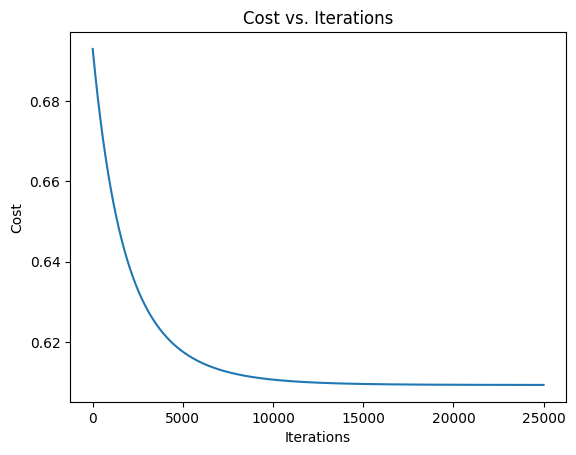

In [52]:
# Plot the cost vs. iterations graph
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()


In [26]:
port_stem = PorterStemmer()

def stemming (content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)  # remove non alphabetic characters and replace them with
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [27]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np

# Preprocessing function
def preprocess_text(text):
    port_stem = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Tokenize and remove stopwords
    words = text.split()
    words = [port_stem.stem(word) for word in words if word not in stop_words]

    # Join the words back into a string
    processed_text = ' '.join(words)

    return processed_text

# Function to extract features
def extract_features(processed_text, frequency_df):
    # Tokenize the processed text into individual words
    words = processed_text.split()

    # Initialize feature vector with bias term
    feature_vector = [1]

    # Calculate sum of positive and negative frequencies for each word in the processed text
    positive_sum = sum(frequency_df.loc[word, 'positive_freq'] if word in frequency_df.index else 0 for word in words)
    negative_sum = sum(frequency_df.loc[word, 'neg_freq'] if word in frequency_df.index else 0 for word in words)

    # Append sums of positive and negative frequencies to the feature vector
    feature_vector.extend([positive_sum, negative_sum])

    return feature_vector

# Example text for prediction


    

In [28]:
def your_function(text):

    # Preprocess the text
    processed_text = preprocess_text(text)

    # Extract features
    feature_vector = extract_features(processed_text, frequency_df)

    # Convert the feature vector to a numpy array
    X_new = np.array(feature_vector).reshape(1, -1)

    # Make predictions on the test set
    predictions = sigmoid(X_new @ theta)

    # Convert probabilities to binary predictions (0 or 1)
    binary_predictions = (predictions >= 0.5).astype(int)

    # Print the predicted sentiment
    if binary_predictions == 1:
        print("Positive sentiment")
    else:
        print("Negative sentiment")

In [29]:
jx = input("Enter your Text for Analisys of  Sentiment: ")
your_function(jx)

Positive sentiment
